In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [14]:
train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [15]:
train["Embarked"].value_counts()

S    484
C    133
Q     50
Name: Embarked, dtype: int64

In [ ]:
#Since we need to change only one embarked value and we see that port S had the maximum count by 
#large range we will use S as our Port for NaN values.

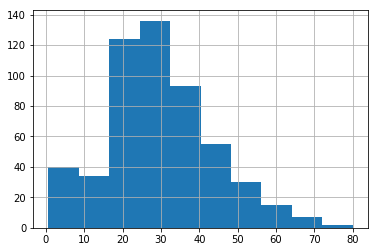

In [20]:
train["Age"].hist()

In [ ]:
# Age is right skewed so instead of mean we should use median.

In [23]:
print(train["Age"].median(skipna = True))
print(train["Age"].mean(skipna = True))

29.0
29.700559701492537


In [ ]:
#There are too many empty cabin values so we will drop that column.

In [24]:
train_XY = train.copy()
train_XY.drop("Cabin",axis = 1,inplace = True)
train_XY.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      1
Survived      0
dtype: int64

In [25]:
train_XY["Age"].fillna(train["Age"].median(skipna = True),inplace = True)
train_XY.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    1
Survived    0
dtype: int64

In [26]:
train_XY["Embarked"].fillna(train["Embarked"].value_counts().idxmax(),inplace = True)
train_XY.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [ ]:
#Both SibSp and Parch relate to travelling with family.
#combining the effect of these variables into one categorical predictor: 
#whether or not that individual was traveling alone.

In [31]:
train_XY["Alone"] = np.where((train_XY["SibSp"]+train_XY["Parch"])> 0,0,1)
train_XY.drop("SibSp",axis = 1,inplace = True)
train_XY.drop("Parch",axis = 1,inplace = True)
train_XY.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Survived,Alone
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,228414,26.000,S,1,0
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,29.0,A/5 2466,8.050,S,0,1
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,250655,26.000,S,0,1
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,349909,21.075,S,0,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,SOTON/OQ 392076,7.050,S,0,1


In [ ]:
#We will remove Name & Ticket column because it will have no effect
#ans replace the strings in Sex,Embarked,Pclass with dummy columns

In [33]:
train_XY = pd.get_dummies(train_XY, columns=["Pclass","Embarked","Sex"])
train_XY.drop("Name",axis = 1,inplace = True)
train_XY.drop("Ticket",axis = 1,inplace = True)
train_XY.head()

,Age,Fare,Survived,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,29.0,26.000,1,0,0,1,0,0,0,1,1,0
1,29.0,8.050,0,1,0,0,1,0,0,1,0,1
2,39.0,26.000,0,1,0,1,0,0,0,1,0,1
3,29.0,21.075,0,0,0,0,1,0,0,1,1,0
4,25.0,7.050,0,1,0,0,1,0,0,1,0,1


In [ ]:
#Since sex female and sex male is telling us the same info in two different forms
#we will drop one of the cloumns

In [34]:
train_XY.drop("Sex_female",axis = 1,inplace = True)
train_XY.head()

,Age,Fare,Survived,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,29.0,26.000,1,0,0,1,0,0,0,1,0
1,29.0,8.050,0,1,0,0,1,0,0,1,1
2,39.0,26.000,0,1,0,1,0,0,0,1,1
3,29.0,21.075,0,0,0,0,1,0,0,1,0
4,25.0,7.050,0,1,0,0,1,0,0,1,1


In [ ]:
#We will apply the same changes to the testing data.

In [35]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          45
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       173
Embarked      1
dtype: int64

In [37]:
test_XY = test.copy()
test_XY.drop("Cabin",axis = 1,inplace = True)
test_XY["Age"].fillna(train["Age"].median(skipna = True),inplace = True)
test_XY["Embarked"].fillna(train["Embarked"].value_counts().idxmax(),inplace = True)
test_XY["Alone"] = np.where((test_XY["SibSp"]+test_XY["Parch"])> 0,0,1)
test_XY.drop("SibSp",axis = 1,inplace = True)
test_XY.drop("Parch",axis = 1,inplace = True)
test_XY = pd.get_dummies(test_XY, columns=["Pclass","Embarked","Sex"])
test_XY.drop("Name",axis = 1,inplace = True)
test_XY.drop("Ticket",axis = 1,inplace = True)
test_XY.drop("Sex_female",axis = 1,inplace = True)
test_XY.head()

,Age,Fare,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,8.0,36.7500,0,0,1,0,0,0,1,1
1,49.0,25.9292,1,1,0,0,0,0,1,0
2,29.0,7.7375,1,0,0,1,0,1,0,1
3,24.0,27.0000,0,0,1,0,0,0,1,0
4,36.0,26.2875,1,1,0,0,0,0,1,1


In [ ]:
#Plotting the graph we can see that being a minor increases your chances of survival.

In [39]:
train_XY['IsMinor']=np.where(train_XY['Age']<=16, 1, 0)
test_XY['IsMinor']=np.where(test_XY['Age']<=16, 1, 0)

In [53]:
cols = ["Age","Fare","Alone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = train_XY[cols]
y = train_XY['Survived']

In [54]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Optimal number of features: 9
Selected features: ['Age', 'Fare', 'Alone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


In [61]:
features = ['Age', 'Fare', 'Alone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = train_XY[features]
X_test = test_XY[features]
Y = train_XY['Survived']
classifier = LogisticRegression()
classifier.fit(X,Y)
Y_pred = classifier.predict(X_test)
np.savetxt('test_result.csv',Y_pred,delimiter=',')